In [2]:
from numpy import *
import pylab
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

Attempt to solve the PA model differential equations system.

In [2]:
# Definition of parameters
p = 0.01
k = 40
q = 8
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def dX_dt(t, X):
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q) + p / 2 * (c_down(c) - c_up(c)) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_down(b, c)) + p * k / 2 * (1 - 2 * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_up(b, c)) + p * k / 2 * (1 - 2 * theta_up(b, c)))) ])
    

In [3]:
def p_from_c(c, q, k):
    """Not working yet, sth is wrong in Arek article or I do not understand it

    Args:
        c (_type_): _description_
        q (_type_): _description_
        k (_type_): _description_

    Returns:
        _type_: _description_
    """    
    b = 2 * (c * (1 - c) * ((1 - c) ** q - c ** q) - (q / k) * (1 - 2 * c) * (c * (1 - c) ** q + (1 - c) * c ** q)) / ((1 - c) ** q - c ** q - (q / k) * (1 - 2 * c) * ((1 - c) ** q + c ** q))
    X = c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q
    Y = c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q - (c_down(c) - c_up(c)) / 2
    return X / (X - Y)

In [4]:
c = 1
q = 8
k = 40

In [5]:
p_from_c(0.6, 8, 40)

-0.048943497987377245

In [6]:
t = linspace(0, 1500,  10000)              # time
X0 = array([0.4, 0.1])                 # initials conditions
sol = integrate.solve_ivp(dX_dt, [0, 3000], X0, dense_output=True)

Text(0, 0.5, 'value')

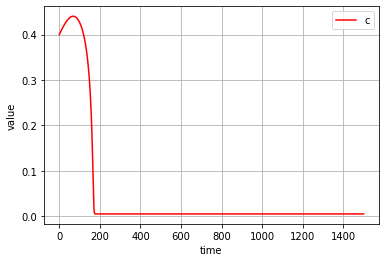

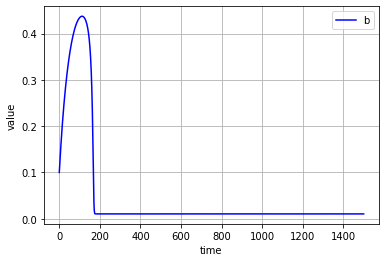

In [7]:
c, b = sol.sol(t)
f1 = pylab.figure()
pylab.plot(t, c, 'r-', label='c')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')
f2 = pylab.figure()
pylab.plot(t, b  , 'b-', label='b')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')

For different $q_a$ and $q_c$

In [8]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.03
k = 50
q_a = 4
q_c = 10
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def dX_dt(t, X, p):
    """ Return the growth rate of fox and rabbit populations. """
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) ])
    

In [9]:
P = linspace(0, 0.07, 100)
t = linspace(0, 10000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.999, 1 - 0.999])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 10000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

KeyboardInterrupt: 

trying to calculate c vs p

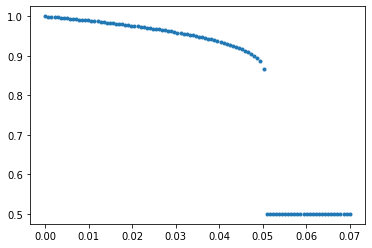

In [ ]:
plt.plot(P, Stable_states, '.')

In [ ]:
P = linspace(0, 0.07, 100)
t = linspace(0, 100000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.50001, 0.1])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 100000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

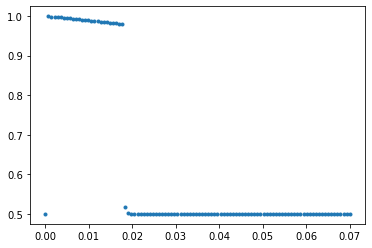

In [ ]:
plt.plot(P, Stable_states, '.')

In [ ]:
 (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) 

In [4]:
from scipy.optimize import fsolve
import scipy.optimize as optimize
q_a = 4
q_c = 10
k = 50
p = 0.03
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def equations(vars):
    b, c = vars
    eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
    eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                        c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
    return [eq1, eq2]

x, y =  fsolve(equations, (0.8, 0.2))

print(x, y)

0.07711420573169014 0.04042509107523247


In [5]:
def f(b):
    eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
    eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                        c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
    return eq2 - eq1

In [34]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.9, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.055, 0.45))

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


(0.0, 0.07)

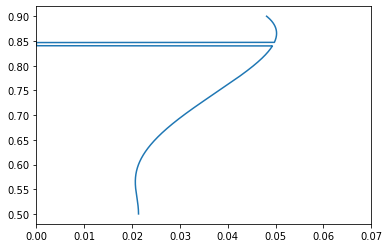

In [43]:
f, ax = plt.subplots()
ax.plot(P, linspace(0.5001, 0.9, 1000))
ax.set_xlim([0, 0.07])

(0.0, 0.07)

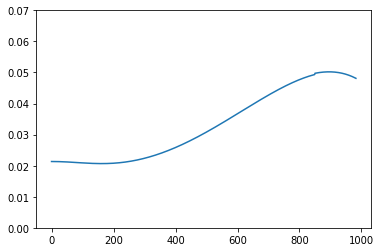

In [36]:
P_prim = delete(P, where(P < 0.001))
plt.plot(P_prim)
plt.ylim([0, 0.07])

In [37]:
len(P) - len(P_prim)


17

In [42]:
P_bis = copy(P)

In [40]:
a = pd.Series(P_bis)

a[a < 0.01] = nan

a.interpolate(method='polynomial', order=2)


0      0.021340
1      0.021340
2      0.021340
3      0.021340
4      0.021339
         ...   
995    0.048320
996    0.048271
997    0.048221
998    0.048170
999    0.048118
Length: 1000, dtype: float64

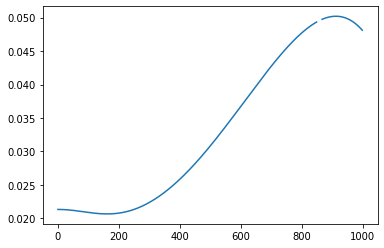

In [41]:
plt.plot(a)